<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [483]:
function binomial_p(n, k, p)
    binomial = (factorial(n)/(factorial(k)*(factorial(n-k))))*(p^k)*((1-p)^(n-k))
    return binomial  
end  

binomial_p (generic function with 1 method)

In [484]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [485]:
p = binomial_p(10, 5, 0.4)
println("The chance of winning the bet is $(p*100)%")

The chance of winning the bet is 20.06581248%


The chance of losing the bet:

In [486]:
x = 0
tot = []
list = setdiff(0:10, [5])
for x in list
    p = binomial_p(10,x,0.4)
    push!(tot,p)
end
y = sum(tot)
println("The chance of losing the bet is $(y*100)%")

The chance of losing the bet is 79.93418752%


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [487]:
money = (p*30 + y*(-10))

if money < 0
    println("I would expect myself to lose money")
else
    println("I would expect myself to earn money")
end
money

I would expect myself to lose money


-7.990273024

### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [488]:
win = binomial_p(10, 4, 0.4)
println("The chance of winning the bet is $(win*100)%")

The chance of winning the bet is 25.0822656%


In [489]:
n = 0
totl = []
list2 = setdiff(0:10, [4])
for n in list2
    p = binomial_p(10,n,0.4)
    push!(totl,p)
end
loss = sum(totl)
println("The chance of losing the bet is $(loss*100)%")

The chance of losing the bet is 74.9177344%


In [490]:
money4 = ((win*30)+(loss*(-10)))

if money4 < 0
    println("I would expect myself to lose money")
else
    println("I would expect myself to earn money")
end

money4

I would expect myself to earn money


0.03290623999999909

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [235]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\elpid\.julia\environments\v1.8\Manifest.toml`


In [500]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [501]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [502]:
using Polynomials
x = collect(x)

line_fit = fit(x,y_observed,1)
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -2.7218551258207078
  3.166957890293909

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [503]:
m = fit_coeff[2]
b = fit_coeff[1]
function chisqr(b,m,x,y_observed,sigma)    
    y_fit = m .* x .+ b 
    chisquare = sum(((y_observed.-y_fit).^2)./(sigma)^2)
    return chisquare
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [504]:
chi2_list = []
for i in 1:10000
    sigma = 3
    y_observed = y_true .+ rand(di.Normal(0,sigma),length(x))
    line_fit = fit(x,y_observed,1)
    fit_coeff = coeffs(line_fit)
    chi_square = chisqr(fit_coeff[1],fit_coeff[2],x,y_observed,sigma)
    push!(chi2_list,chi_square)
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [505]:
mean = sum(chi2_list)/length(chi2_list)

9.03511634429153

This degree of freedom does make sense since N=11, N-2 = 9 and this mean is very close to that value.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

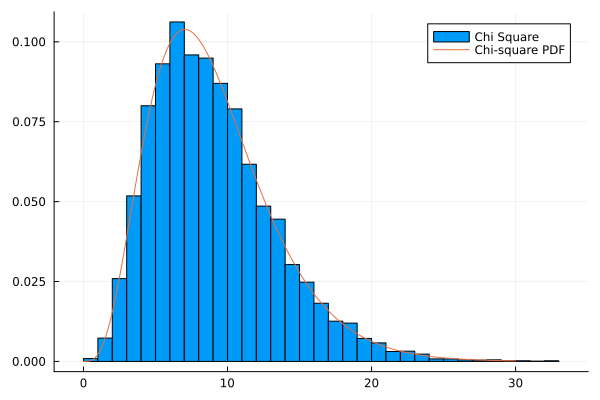

In [506]:
using Plots
using Statistics
using Distributions

chi2_dist = Chisq(mean)

x_dist = 0:0.1:30

chi2_pdf = pdf.(chi2_dist, x_dist)

histogram(chi2_list, bins=50, normalize = true, label="Chi Square")
plot!(x_dist, chi2_pdf, label="Chi-square PDF")

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [507]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [508]:
m_range = 1:0.01:5
b_range = -7:0.01:3

-7.0:0.01:3.0

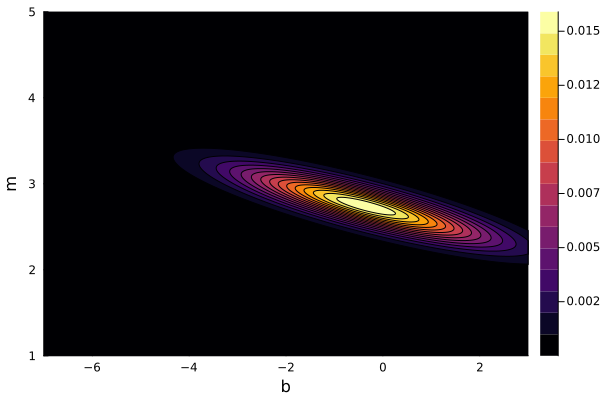

In [509]:
using Plots
contourf(b_range,m_range,p_chi2poly, xlabel="b", ylabel="m")

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

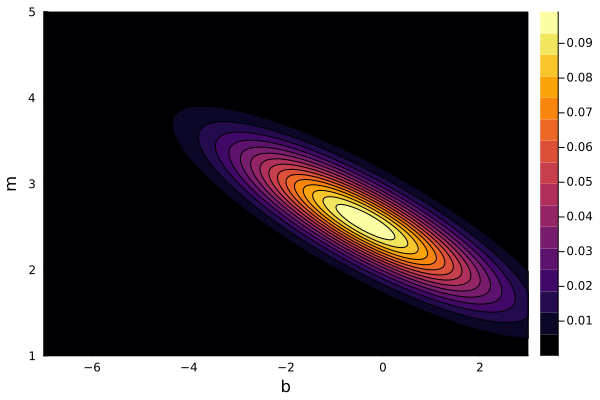

In [510]:
x = 0:0.5:5
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3

contourf(b_range,m_range,p_chi2poly, xlabel="b", ylabel="m")

Compared to the contour plot in 2.6, this is much wider and more angled. Both graphs have the same amount of data but this one has a much smaller range due to the 0.5 difference between each point rather than a 1.0 difference, making it seem as though the noise has a greater effect on its width and angle. 

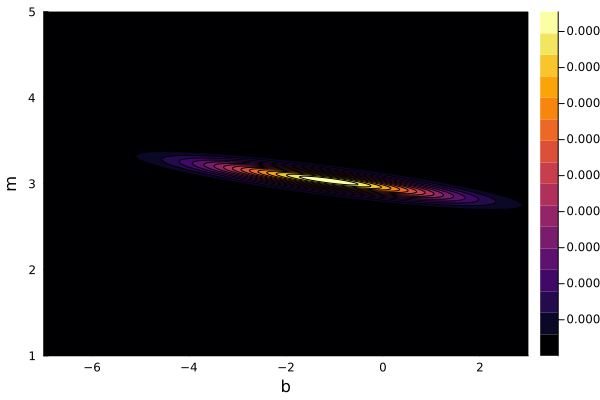

In [511]:
x = 0:2:20
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3

contourf(b_range,m_range,p_chi2poly, xlabel="b", ylabel="m")

This graph is much thinner than that of 2.6, likely thanks to its larger range. While once again the number of data points is the same, this range goes from 0 to 20, rather than 0 to 10, which makes it look much thinner and not nearly as angled. This graph is not as affected by the noise.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

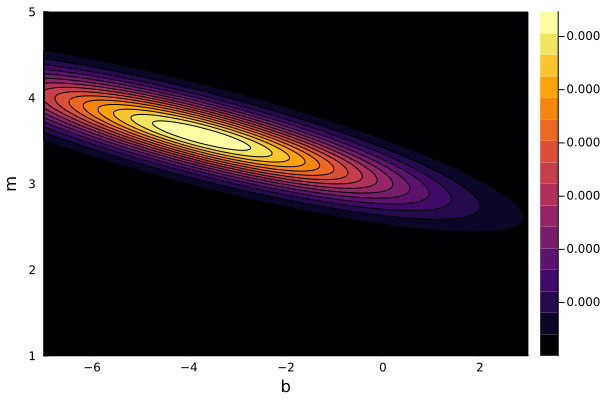

In [512]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3

contourf(b_range,m_range,p_chi2poly, xlabel="b", ylabel="m")

This graph presents as much larger than that of 2.6, thanks to the increase in the sigma value. With this change, this graph seems to be much more affected by the noise and appears larger to the point that it is extending past the boundaries of the plot. The tilt does not seem too different, but the contour itself is both wider and longer thanks to the change in the sigma.

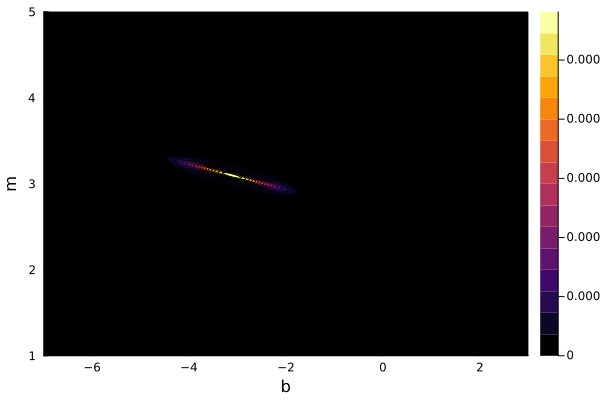

In [513]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
m_range = 1:0.01:5
b_range = -7:0.01:3

contourf(b_range,m_range,p_chi2poly, xlabel="b", ylabel="m")

This is the exact opposite case as before, this graph is much smaller than that of 2.6. With the sigma value decreasing to 1, the graph is shorter and thinner, with the viewer barely being able to make out specific details. This is of course due to the drastic decrease in the sigma value, the data is not nearly as affected by the noise.